In [1]:
import os
import shutil
import sys

import network

import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics


/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
datafile = 'Data/cc_images.mm'
labelsfile = 'Data/labels.mm'

In [43]:
#cc = [0,1,7]
cc = [0,1,2,3,4,5,6,7]
c = network.get_classifier(datafile, labelsfile, 32, 5, cc)

reducing classes


In [44]:
!rm -rf logs

In [45]:
c.train(n_iter=20000, learning_rate=0.0008)

***********************
[[11  1  0  3  0  0  1  0]
 [13  2  0  0  0  0  0  1]
 [ 7  2  1  4  1  1  0  0]
 [ 9  7  0  0  0  0  0  0]
 [12  2  0  1  0  0  0  1]
 [ 4  3  0  5  0  0  0  4]
 [ 5  4  0  7  0  0  0  0]
 [ 6  2  0  4  1  0  0  3]]
0 1258.873 1238.4296
1000 198.7122 1238.4296
[[ 3  1  1  2  0  7  2  0]
 [ 0  6  4  1  2  1  0  2]
 [ 1  4  9  1  0  0  0  1]
 [ 1  2  0 11  0  0  2  0]
 [ 0  0  0  0  7  2  2  5]
 [ 0  0  0  0  1  9  0  6]
 [ 1  0  0  2  4  1  4  4]
 [ 0  0  0  0  4  3  0  9]]
2000 197.67186 205.71974
3000 184.76709 205.71974
[[ 0  2  0  2  3  4  3  2]
 [ 2  8  3  0  0  1  2  0]
 [ 0  9  5  0  0  0  0  2]
 [ 1  0  0 14  0  0  0  1]
 [ 0  0  0  0 12  1  1  2]
 [ 3  0  0  2  2  6  0  3]
 [ 4  1  0  2  7  1  1  0]
 [ 1  1  0  0  3  3  0  8]]
4000 186.85233 201.39514
5000 194.51321 201.39514
[[ 3  2  0  1  1  3  3  3]
 [ 0  5  2  6  0  1  1  1]
 [ 0  3 12  0  0  0  1  0]
 [ 1  1  0 13  0  0  0  1]
 [ 0  0  0  0  4  1  5  6]
 [ 3  1  1  0  1  5  0  5]
 [ 1  0  0  5  1  

In [48]:
tb, tl = c.get_balanced_batch(c.val_images,
                              c.val_labels,
                              c.class_where_val,
                              800)

vl, vsm, vlb, vcm = c.sess.run([c.loss, c.softmax, c.label_batch, c.confmat],
                      feed_dict={c.image_batch:tb,
                                 c.label_batch:tl,
                                 c.is_training:False})


In [49]:
tl.shape, np.argmax(vsm, axis=-1).shape
tls = np.argmax(tl, axis=-1)
vsms = np.argmax(vsm, axis=-1)

In [50]:
print(metrics.classification_report(tls, vsms))
print(metrics.accuracy_score(tls, vsms))

             precision    recall  f1-score   support

          0       0.42      0.31      0.36       100
          1       0.47      0.51      0.49       100
          2       0.66      0.39      0.49       100
          3       0.67      0.80      0.73       100
          4       0.09      0.10      0.10        31
          5       0.36      0.48      0.41       100
          6       0.44      0.44      0.44       100
          7       0.49      0.52      0.50        89

avg / total       0.48      0.47      0.47       720

0.475


In [51]:
_ = plt.hist(np.max(vsm, axis=1), bins=25)
_ = plt.hist(np.min(vsm, axis=1), bins=25)

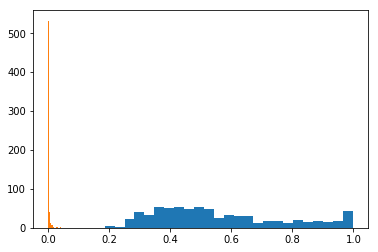

In [52]:
plt.show()

In [53]:
cm = metrics.confusion_matrix(tls, vsms)
cm = cm/cm.sum(axis=1)
import pandas as pd
cmdf = pd.DataFrame(cm)

In [54]:
cmdf

,0,1,2,3,4,5,6,7
0,0.31,0.03,0.03,0.05,0.193548,0.29,0.09,0.157303
1,0.01,0.51,0.14,0.14,0.000000,0.07,0.12,0.011236
2,0.01,0.34,0.39,0.07,0.064516,0.09,0.05,0.033708
3,0.04,0.06,0.01,0.80,0.000000,0.02,0.06,0.011236
4,0.03,0.00,0.00,0.02,0.096774,0.05,0.12,0.067416
5,0.17,0.06,0.01,0.02,0.129032,0.48,0.05,0.191011
6,0.15,0.04,0.01,0.10,0.322581,0.10,0.44,0.067416
7,0.02,0.04,0.00,0.00,0.225806,0.24,0.06,0.516854


In [55]:
import seaborn as sns
sns.heatmap(cm)

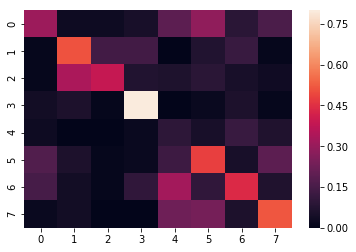

In [56]:
plt.show()